### Notebook to test OptoSim photon transport

In [1]:
import sys
sys.path.insert(0,'../python/')
from OpticalPhoton import *
import matplotlib.pyplot as plt
import matplotlib as mpl

#### Setup the system geometry

In [2]:
ztop = 1.0 # z position of top PMT plane (cm)
zbot = -9.0 # z position of bottom PMT plane (cm)
R = 2.5 # radius of the TPC (cm)

#### Setup the simulation parameters

In [3]:
n_photon = 100 # number of photons to simulate
x0 = (2.4, 0., 0.2) # starting position of the photons

#### Simulate photon transport

In [4]:
myPhoton = OpticalPhoton(zbot=zbot, ztop=ztop, R=R)
myPhoton.set_no_scattering(False)

xb = []
yb = []
xt = []
yt = []

for i in range(n_photon):
    if i%10000 == 0:
        print('processed ',i,' photons')
    # normal
    myPhoton.generate_photon(x0=x0)
    #myPhoton.set_photon_direction(np.array([0,0,-1]))
    myPhoton.propagate()
    
    if myPhoton.is_detected():
        x = myPhoton.get_photon_position()
        #myPhoton.print()
        if x[2]<0:
            xb.append(x[0])
            yb.append(x[1])
        else:
            xt.append(x[0])
            yt.append(x[1])

    
xb = np.array(xb)
yb = np.array(yb)
xt = np.array(xt)
yt = np.array(yt)

print(len(xb), len(xt))

processed  0  photons

x = (2.4620810174573466, -0.20583087665502575, 2.7755575615628914e-17) t = [ 0.14094918 -0.46731986 -0.87278031] medium = 1
nvec [-0.99372787  0.11182543  0.        ]
x = (2.484319667221448, -0.2795635724780931, -0.13770534972097379) t = [-0.24128501 -0.42430658 -0.87278031] medium = 1

x = (2.484319667221448, -0.2795635724780931, -0.13770534972097379) t = [-0.24128501 -0.42430658 -0.87278031] medium = 1
nvec [-0.60418861  0.79684134  0.        ]
x = (1.5104715294460038, -1.992103350414594, -3.6603257423910507) t = [-0.47368418 -0.11780416 -0.87278031] medium = 1

x = (1.5104715294460038, -1.992103350414594, -3.6603257423910507) t = [-0.47368418 -0.11780416 -0.87278031] medium = 1
nvec [0.1605443  0.98702864 0.        ]
x = (-0.40136074333209426, -2.467571590392447, -7.18294613506113) t = [-0.41193134  0.26185319 -0.87278031] medium = 1

x = [2.4 0.  0.2] t = [ 0.12658549 -0.35598757  0.9258774 ] medium = 0
nvec [-0.99511275  0.09874516  0.        ]
x = (2.487781

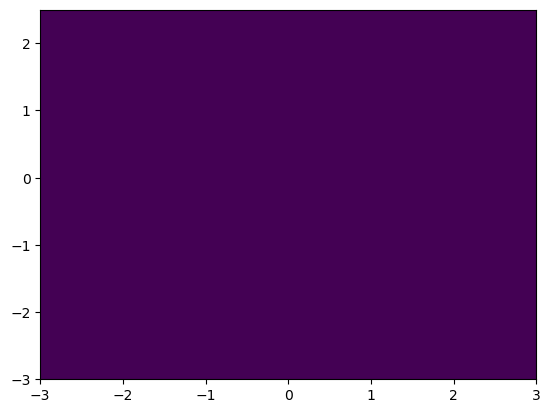

In [5]:
h2=plt.hist2d(xb,yb,bins=(25,25),range=((-3.0,3.0),(-3.0,2.5)), norm=mpl.colors.LogNorm())

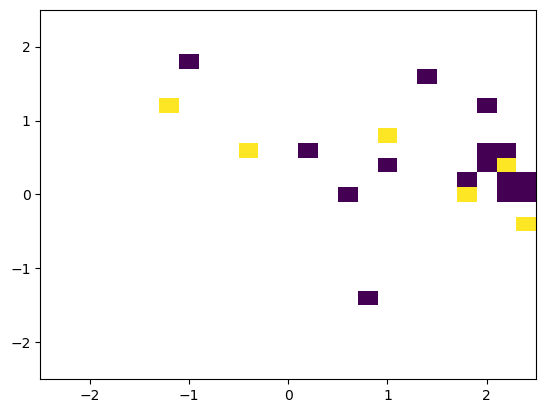

In [6]:
h2=plt.hist2d(xt,yt,bins=(25,25),range=((-2.5,2.5),(-2.5,2.5)), norm=mpl.colors.LogNorm())

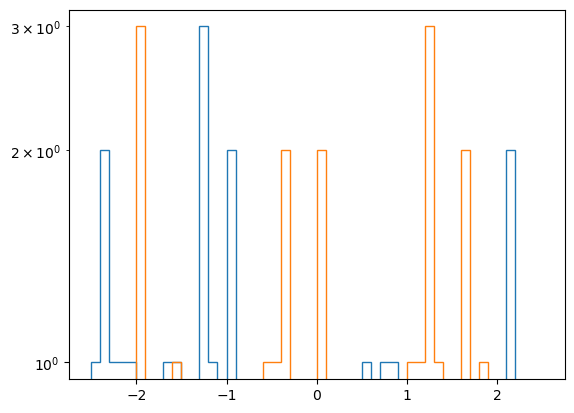

In [7]:
plt.hist(xb,bins=50,range=(-2.5,2.5), histtype='step')
plt.hist(yb,bins=50,range=(-2.5,2.5), histtype='step')


plt.yscale('log')

In [8]:
13762/86238

0.15958162295043948